In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

__Oppgave 1__ <br>
<span style="color:gray">*Read the CSV file in Pandas and create a DataFrame named Grc_df. What is the number of
rows and columns in Grc_df? <br> Print the first 10 and last 10 rows of Grc_df.*</span><br><br>
Answer: The number of rows are 5000 x 11 colums

In [99]:
#Reading the csv file and creating a DataFrame names Grc_df
Grc_df = pd.read_csv('Grocery_dataset.csv', index_col=0)

#Check number of rows and colums
Grc_df.shape

(5000, 11)

In [100]:
#Printing the first 10 rows
Grc_df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [101]:
#Printing the last 10 rows
Grc_df.tail(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDE46,18.60,Low Fat,0.015859,Snack Foods,152.9366,OUT017,2007,NaN,Tier 2,Supermarket Type1,453.4098
NCQ53,17.60,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240
NCN42,20.25,Low Fat,0.014281,Household,148.0418,OUT018,2009,Medium,Tier 3,Supermarket Type2,1177.1344
DRH11,5.98,Low Fat,0.075675,Hard Drinks,53.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,331.5684
NCI42,18.75,Low Fat,0.010382,Household,207.8954,OUT049,1999,Medium,Tier 1,Supermarket Type1,2292.3494
FDT07,5.82,Regular,0.077476,Fruits and Vegetables,255.3330,OUT045,2002,NaN,Tier 2,Supermarket Type1,4870.3270
DRL60,8.52,Low Fat,0.027059,Soft Drinks,153.3682,OUT046,1997,Small,Tier 1,Supermarket Type1,914.8092
FDG20,15.50,Regular,0.126200,Fruits and Vegetables,178.4028,OUT018,2009,Medium,Tier 3,Supermarket Type2,1239.7196
FDF56,16.70,Regular,0.119462,Fruits and Vegetables,182.7976,OUT046,1997,Small,Tier 1,Supermarket Type1,1810.9760


__Oppgave 2__<br>
<span style="color:gray">*Are there any null values in the Grc_df? If yes, then in which columns and how many?
Finally, handle these null values using any strategy shown during the labs.*</span><br><br>

Answer: Grc_df.info() shows that there are 818 null values in Item_Weight and 1439 null values in Outlet_Size. We opted for imputation to handle missing values because eliminating a large number of rows would significantly reduce the size of our dataframe, potentially affecting the robustness of our subsequent analysis or model. We replace the Item_Weight with the mean. The benefit of using the mean is that it doesn't change the overall mean of the dataset. Since Outlet_Size is categorical, we can't compute a mean. However, using Sikt-KI chat's advice, we assessed category frequencies to handle missing values, maintaining the original distribution.


In [102]:
#Check is there are null values
Grc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, FDA15 to FDV33
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4182 non-null   float64
 1   Item_Fat_Content           5000 non-null   object 
 2   Item_Visibility            5000 non-null   float64
 3   Item_Type                  5000 non-null   object 
 4   Item_MRP                   5000 non-null   float64
 5   Outlet_Identifier          5000 non-null   object 
 6   Outlet_Establishment_Year  5000 non-null   int64  
 7   Outlet_Size                3561 non-null   object 
 8   Outlet_Location_Type       5000 non-null   object 
 9   Outlet_Type                5000 non-null   object 
 10  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 468.8+ KB


In [103]:
#Check the number of null values
Grc_df = Grc_df.replace(' ', np.nan)
Grc_df.isna().sum()

Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [104]:
#Finding the mean for Item_weight, skipping null values
avgWeight = Grc_df['Item_Weight'].median()

#Replacing null values of Item_weight with median
Grc_df['Item_Weight'].fillna(avgWeight, inplace=True)

In [105]:
# Get the distribution of the non-null values
dist = Grc_df['Outlet_Size'].value_counts(normalize=True)

# Get a list of the categories
categories = dist.index

# Create a list to sample from, replicating the distribution
fill_list = np.random.choice(categories, size=Grc_df['Outlet_Size'].isnull().sum(), p=dist.values)

# Replace the NaN values in the DataFrame
Grc_df.loc[Grc_df['Outlet_Size'].isnull(), 'Outlet_Size'] = fill_list

__Oppgave 3__<br>
<span style="color:gray">*How many unique Outlet Sizes are there in the Grc_df? Which outlet size is maximum, and which is minimum?*</span><br><br>

Answer: 3 (Medium, High, Small) <br>
Max: Small  <br>
Min: High

In [106]:
#Check for number of unique Outlet Sizes
Grc_df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [107]:
#Check for the most frequent(maximum) Outlet Size
Grc_df.Outlet_Size.max()

'Small'

In [108]:
#Check for the least frequent(minimum) Outlet Size
Grc_df.Outlet_Size.min()

'High'

__Oppgave 4__<br>
<span style="color:gray">*How many unique Item Fat Content types are in the Grc_df? List them. Do you see any
issues with the Item Fat Content types? If yes, then handle this issue.*</span> <br><br>

Answer: The labeling for 'Low Fat' and 'Regular' categories in the dataset lacks uniformity. Variations like 'low fat', 'LF', or 'reg' are used interchangeably. To maintain consistency in our data, we should standardize these labels to only 'Low Fat' and 'Regular'

In [109]:
Grc_df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [110]:
# Create a dictionary of terms we want to replace
replace_dict = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}

# Replace terms in the table according to replace_dict
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace(replace_dict)

__Oppgave 5__<br>
<span style="color:gray">*Drop the columns having index values of 0, 6 and create a new DataFrame Grc_new_df.*</span>

In [111]:
# Get the column names to drop
cols_to_drop = Grc_df.columns[[0, 6]]

# Drop the columns and create a new DataFrame
Grc_new_df = Grc_df.drop(cols_to_drop, axis=1)

__Oppgave 6__<br><br>
<span style="color:gray">*Using different Supermarket type listed in the column Outlet_Type create two different
DataFrames from Grc_new_df. <br> Name these DataFrames as SupType_1 and SupType_2.*</span>

In [112]:
SupType_1 = Grc_new_df.loc[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df.loc[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

__Oppgave 7__<br><br>
<span style="color:gray">*Using Seaborn (“ggplot style”) create a (2,1) subplot of a box plot showing 5-point 
summary of the column Item_MRP for SupType_1 and SupType_2. <br>Which Outlet Type has 
a higher median MRP? Are there any outliers?*</span><br><br>

Answer: Supermarked Type 1 seems to have a bit higher median than Supermarked Type 2. For Type 1 it is almost at 150, <br>
but for Type 2 it is closer to the middle between 100 and 150.<br><br>
There do not appear to be any obvious outliers in either boxplot, as no points are plotted separately from the whiskers

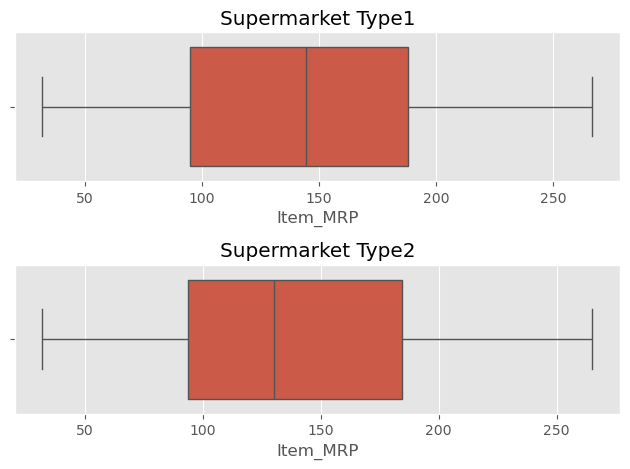

In [113]:
# Set the style to ggplot
plt.style.use('ggplot')

# Create a subplot with 2 rows and 1 column
fig, axes = plt.subplots(2, 1)

# Create a boxplot for SupType_1
sns.boxplot(ax=axes[0], x='Item_MRP', data=SupType_1)
axes[0].set_title('Supermarket Type1')

# Create a boxplot for SupType_2
sns.boxplot(ax=axes[1], x='Item_MRP', data=SupType_2)
axes[1].set_title('Supermarket Type2')

# Display the plot
plt.tight_layout()
plt.show()

__Oppgave 8__<br><br>
<span style="color:gray">*Concatenate the DataFrames SupType_1 and SupType_2 to create a new DataFrame 
Grc_Concat_df and sort it in ascending order based on the column Item_Outlet_Sales. 
What is the Outlet_Location_type of the store with the lowest sales?*</span><br><br>

Answer:
Tier 3 is the Outlet Location Type of the store with the lowest sales.  

In [118]:
# Concatenate the DataFrames
Grc_Concat_df = pd.concat([SupType_1, SupType_2])

# Sort the DataFrame
Grc_Concat_df = Grc_Concat_df.sort_values('Item_Outlet_Sales')

Grc_Concat_df.head()



,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,
NCA06,Low Fat,0.143164,Household,34.9190,OUT013,High,Tier 3,Supermarket Type1,73.2380
FDL52,Regular,0.046278,Frozen Foods,36.7506,OUT018,Medium,Tier 3,Supermarket Type2,75.9012
FDA39,Low Fat,0.012770,Meat,39.9822,OUT018,Medium,Tier 3,Supermarket Type2,78.5644
NCR42,Low Fat,0.038560,Household,33.8900,OUT045,Small,Tier 2,Supermarket Type1,99.8700
NCO06,Low Fat,0.108030,Household,32.4558,OUT046,Small,Tier 1,Supermarket Type1,101.8674
